In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
## Particle class
## Stolen from Adrian

class particle(object):
    
    def __init__(self, mass=1., y=0., v=0.):
        self.mass = mass
        self.y = y
        self.v = v
        
    def euler(self, f, dt):
        self.y = self.y + self.v*dt
        self.v = self.v + (f/self.mass)*dt
        
    def euler_cromer(self, f, dt):
        self.v = self.v + f/self.mass*dt
        self.y = self.y + self.v*dt

In [3]:
## Define constants
G = 6.674*10**(-11)  # gravitational constant; m3/(kgs2)
Me = 5.9722*(10**24) # mass of earth; kg
Re = 6371000.      # volumetric mean radius of earth; m (NASA Earth factsheet)

m = 70             # Felix mass; kg
r = .5             # Felix radius (spherical approximation); m

C = 0.47           # drag coefficient
A = math.pi*r**2   # cross-sectional area


In [28]:
## Define functions to calculate changing variables

def grav(h):
    return (G*Me)/(Re + h)**2

def fdrag(rho, v, C, A):
    return .5*rho*C*A*(v*abs(v))

## drag coefficient?
    
def calc_rho(h):
    ## Troposphere
    if h<11000.:
        T = 15.04 - 0.00649*h # celsius :-/
        p = 101.29*((T + 273.1)/288.08)**5.256
        rho = p/(.2869*(T + 273.1))
        return rho
        
    ## Lower Stratosphere
    elif h>=11000. and h<25000.:
        T = -56.46
        p = 22.65*math.exp(1.73 - .000157*h)
        rho = p/(.2869*(T + 273.1))
        return rho
    
    ## Upper Stratosphere
    elif h>=25000. and h<50000.:
        T = -131.21 + 0.00299*h
        p = 2.488*((T + 273.1)/216.6)**(-11.388)
        rho = p/(.2869*(T + 273.1))
        return rho
    

In [37]:
## Calculate jump

y0 = 38969.4 # altitude; m
v0 = 0.
t0 = 0.
dt = 0.1     # time step

t = [t0]
y = [y0]
v = [v0]

# fd = []
# rho = []
# g = []

p = particle(m, y0, v0)

while p.y > 0.:
    
#     r = calc_rho(y[-1])
#     rho.append(r)
#     drag = fdrag(r, p.v, C, A)
#     fd.append(drag)
#     gforce = grav(y[-1])*m
#     g.append(gforce)
        
    fy = -fdrag(calc_rho(y[-1]), p.v, C, A) - grav(y[-1])*m
    p.euler(fy, dt)
    y.append(p.y)
    v.append(p.v)
    t.append(t[-1]+dt)

tdata = np.array(t)
ydata = np.array(y)
vdata = np.array(v)

In [40]:
## Repeat jump, with constant gravitational acceleration g = 9.81
y0 = 38969.4
v0 = 0.
t0 = 0.
t_g = [t0]
y_g = [y0]
v_g = [v0]
dt = 0.1
p_g = particle(m, y0, v0)

while p_g.y > 0.:
    fy_g = -fdrag(calc_rho(y_g[-1]), p_g.v, C, A) - 9.81*m
    p_g.euler(fy_g, dt)
    y_g.append(p_g.y)
    v_g.append(p_g.v)
    t_g.append(t_g[-1]+dt)

tdata_g = np.array(t_g)
ydata_g = np.array(y_g)
vdata_g = np.array(v_g)

Text(0.5, 1.0, 'Stratos Jump: Velocity Calculation')

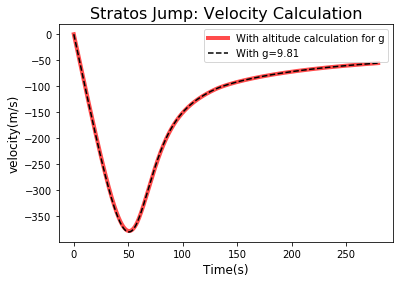

In [50]:
## Plot velocity

plt.plot(tdata, vdata, color="#FF0000", ls='-', lw=4, alpha=.7, label='With altitude calculation for g')
plt.plot(tdata_g, vdata_g, 'k--', label='With g=9.81')

plt.title('Stratos Jump: Velocity Calculation', fontsize=16)
plt.xlabel('Time(s)', fontsize=12)
plt.ylabel('velocity(m/s)', fontsize=12)
plt.legend()

Text(0.5, 1.0, 'Stratos Jump: Position Calculation')

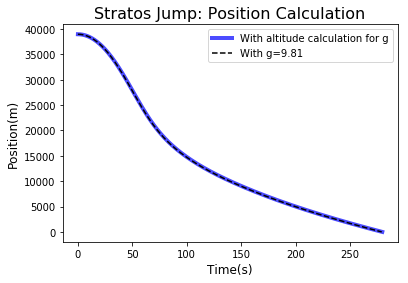

In [49]:
## Plot altitude

plt.plot(tdata, ydata, color="#0000FF", ls='-', lw=4, alpha=.7, label='With altitude calculation for g')
plt.plot(tdata_g, ydata_g, 'k--', label='With g=9.81')

plt.title('Stratos Jump: Position Calculation', fontsize=16)
plt.ylabel('Position(m)', fontsize=12)
plt.xlabel('Time(s)', fontsize=12)
plt.legend()